In [2]:
!pip install rasterio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.3 MB 1.1 MB/s 


In [3]:
import numpy 
import matplotlib.pyplot as plt
import rasterio

In [4]:
!unzip /content/drive/MyDrive/images.zip

Archive:  /content/drive/MyDrive/images.zip
   creating: images/
  inflating: images/fcc_R2A_AW_20220404_098_043_C_01.tif  
  inflating: images/fcc_R2A_AW_20220404_098_048_A_01.tif  
  inflating: images/fcc_R2A_AW_20220404_098_048_C_01.tif  
  inflating: images/fcc_R2A_AW_20220404_098_053_A_01.tif  
  inflating: images/fcc_R2A_AW_20220404_098_053_C_01.tif  
  inflating: images/fcc_R2A_AW_20220404_098_058_A_01.tif  
  inflating: images/fcc_R2A_AW_20220404_098_058_C_01.tif  
  inflating: images/fcc_R2A_AW_20220404_098_063_A_01.tif  
  inflating: images/fcc_R2A_AW_20220404_098_063_C_01.tif  
  inflating: images/fcc_R2A_AW_20220405_103_052_A_01.tif  
  inflating: images/fcc_R2A_AW_20220405_103_052_C_01.tif  
  inflating: images/fcc_R2A_AW_20220405_103_057_A_01.tif  
  inflating: images/fcc_R2A_AW_20220405_103_057_C_01.tif  
  inflating: images/fcc_R2A_AW_20220405_103_062_A_01.tif  
  inflating: images/fcc_R2A_AW_20220405_103_062_C_01.tif  
  inflating: images/fcc_R2A_AW_20220405_103_067_A_

In [5]:
import  os
ctr=0
for i in os.listdir('/content/images/'):
  os.rename('/content/images/'+i, '/content/images/'+str(ctr)+'.tif')
  ctr+=1

In [4]:
ds = rasterio.open('./images/0.tif')

In [5]:
ds.transform

Affine(56.0, 0.0, -250068.0,
       0.0, -56.0, 223804.0)

In [6]:
ds.crs

CRS.from_wkt('PROJCS["unnamed",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.25722293287,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Lambert_Conformal_Conic_2SP"],PARAMETER["latitude_of_origin",14.2385239511684],PARAMETER["central_meridian",79.5669433177894],PARAMETER["standard_parallel_1",15.2543751201685],PARAMETER["standard_parallel_2",13.2571816219396],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]')

In [7]:
ds.indexes

(1, 2, 3)

In [8]:
img = ds.read(1)

In [9]:
img.shape

(7882, 8572)

In [10]:
img.min(), img.max()

(0, 226)

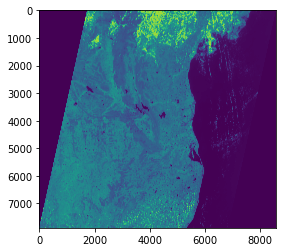

In [11]:
plt.imshow(img)

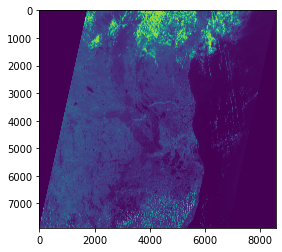

In [12]:
img = ds.read(2)
plt.imshow(img)

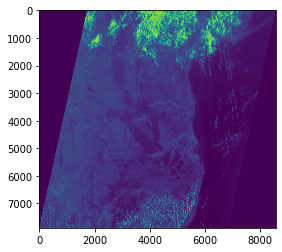

In [15]:
img = ds.read(3)
plt.imshow(img)

In [13]:
ds.profile

{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': 255.0, 'width': 8572, 'height': 7882, 'count': 3, 'crs': CRS.from_wkt('PROJCS["unnamed",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.25722293287,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Lambert_Conformal_Conic_2SP"],PARAMETER["latitude_of_origin",14.2385239511684],PARAMETER["central_meridian",79.5669433177894],PARAMETER["standard_parallel_1",15.2543751201685],PARAMETER["standard_parallel_2",13.2571816219396],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'), 'transform': Affine(56.0, 0.0, -250068.0,
       0.0, -56.0, 223804.0), 'tiled': False, 'compress': 'jpeg', 'interleave': 'pixel'}

In [14]:
ds.bounds

BoundingBox(left=-250068.0, bottom=-217588.0, right=229964.0, top=223804.0)

In [15]:
last_cell = (ds.profile['width'], ds.profile['height'])
ds.profile['transform']*last_cell

(229964.0, -217588.0)

In [17]:
ds1 = rasterio.open('./images/1.tif')

In [35]:
ds1.crs

CRS.from_wkt('PROJCS["unnamed",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.25722293287,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Lambert_Conformal_Conic_2SP"],PARAMETER["latitude_of_origin",28.6808917621513],PARAMETER["central_meridian",73.9709137853831],PARAMETER["standard_parallel_1",29.7231367877044],PARAMETER["standard_parallel_2",27.5906133136802],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]')

In [37]:
(ds.crs) == ds1.crs

False

In [38]:
ds

<open DatasetReader name='./images/0.tif' mode='r'>

In [39]:
ds1.transform

Affine(56.0, 0.0, -243796.0,
       0.0, -56.0, 233324.0)

In [40]:
ds.transform

Affine(56.0, 0.0, -250068.0,
       0.0, -56.0, 223804.0)

In [41]:
last_cell = (ds1.profile['width'], ds1.profile['height'])
ds1.profile['transform']*last_cell

(264012.0, -237748.0)

In [42]:
ds.bounds

BoundingBox(left=-250068.0, bottom=-217588.0, right=229964.0, top=223804.0)

In [43]:
ds1.bounds

BoundingBox(left=-243796.0, bottom=-237748.0, right=264012.0, top=233324.0)

In [44]:
ds1.transform

Affine(56.0, 0.0, -243796.0,
       0.0, -56.0, 233324.0)

In [48]:
ds.crs.is_projected

True

In [49]:
ds.crs

CRS.from_wkt('PROJCS["unnamed",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.25722293287,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Lambert_Conformal_Conic_2SP"],PARAMETER["latitude_of_origin",14.2385239511684],PARAMETER["central_meridian",79.5669433177894],PARAMETER["standard_parallel_1",15.2543751201685],PARAMETER["standard_parallel_2",13.2571816219396],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]')

In [69]:
ds1.read().shape

(3, 8412, 9068)

In [75]:
rasterio.band(ds1, [1, 2, 3])

(Band(ds=<open DatasetReader name='./images/1.tif' mode='r'>, bidx=[1, 2, 3, 4], dtype='uint8', shape=(8412, 9068)),
 4)

In [18]:
from rasterio.warp import reproject
im1_reproj, im1_reproj_trans = reproject(source=rasterio.band(ds1, [1, 2, 3]),
                                               dst_crs=ds.profile['crs'],
                                               dst_resolution=(30, 30)
                                              )

In [64]:
import numpy as np
rasterio.band(ds, 1).dtype

'uint8'

In [78]:
im1_reproject_ds

NameError: ignored

In [ ]:
from rasterio.io import MemoryFile
from rasterio.merge import merge

def create_dataset(data, crs, transform):
    # Receives a 2D array, a transform and a crs to create a rasterio dataset
    memfile = MemoryFile()
    dataset = memfile.open(driver='GTiff', height=data.shape[1], width=data.shape[2], count=3, crs=crs, 
                           transform=transform, dtype=data.dtype)
    dataset.write(data, [1, 2, 3])
        
    return dataset

im1_reproj_ds = create_dataset(im1_reproj, ds.profile['crs'], im1_reproj_trans)

merged, transf = merge([im1_reproj_ds, ds])

plt.figure(figsize=(12,6))
plt.imshow(merged[0])

In [117]:
im1_reproj_trans

Affine(30.0, 0.0, -820153.0290363088,
       0.0, -30.0, 1870028.4203572958)

In [122]:
ds.profile

{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': 255.0, 'width': 8572, 'height': 7882, 'count': 3, 'crs': CRS.from_wkt('PROJCS["unnamed",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.25722293287,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Lambert_Conformal_Conic_2SP"],PARAMETER["latitude_of_origin",14.2385239511684],PARAMETER["central_meridian",79.5669433177894],PARAMETER["standard_parallel_1",15.2543751201685],PARAMETER["standard_parallel_2",13.2571816219396],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'), 'transform': Affine(56.0, 0.0, -250068.0,
       0.0, -56.0, 223804.0), 'tiled': False, 'compress': 'jpeg', 'interleave': 'pixel'}

In [82]:
ds

<open DatasetReader name='./images/0.tif' mode='r'>

In [93]:
rasterio.band(ds, [1, 2, 3])

Band(ds=<open DatasetReader name='./images/0.tif' mode='r'>, bidx=[1, 2, 3], dtype='uint8', shape=(7882, 8572))